Theme of the project is Parkinson Disease Prediction.

What is Parkinson disease?
    Parkinson’s disease is a brain disorder that causes unintended or uncontrollable movements, such as shaking, 
    stiffness, and difficulty with balance and coordination.

What causes Parkinson's disease?
    The most prominent signs and symptoms of Parkinson’s disease occur when nerve cells in the basal ganglia, 
    an area of the brain that controls movement, become impaired and/or die.

Dataset used in this project is
    https://archive.ics.uci.edu/dataset/174/parkinsons

The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre 
for Voice and Speech, Denver, Colorado, who recorded the speech signals. 

The characteristics of these speech signals indicated a disease such as Parkinson's.

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease.

Each column in the table is a particular voice measure.
Each row corresponds one of 195 voice recording from these individuals ("name" column). 

The main aim of the data is to discriminate healthy people from those with PD, 
according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. 
There are around six recordings per patient, the name of the patient is identified in the first column.

Used literature: 
    https://www.nia.nih.gov/health/parkinsons-disease
    https://ieeexplore.ieee.org/document/4636708
    numpy,pandas,matplotlib,sklearn documentation
Used technologies:
    jupyter notebook
    numpy
    pandas
    matplotlib
    sklearn
    seaborn
    xgboost

In [6]:
# Dataset Analysis and Visualization 

# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns
import xgboost as xgb

In [7]:
# Load parkinsons dataset into pandas DataFrame

data = pd.read_csv("parkinsons.data")

In [8]:
# Info about dataset columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Dataset's attributes informations:
    name - ASCII subject name and recording number
    MDVP:Fo(Hz) - Average vocal fundamental frequency
    MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
    MDVP:Flo(Hz) - Minimum vocal fundamental frequency
    MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
    measures of variation in fundamental frequency
    MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
    NHR,HNR - Two measures of ratio of noise to tonal components in the voice
    status - Health status of the subject (one) - Parkinson's, (zero) - healthy
    RPDE,D2 - Two nonlinear dynamical complexity measures
    DFA - Signal fractal scaling exponent
    spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [10]:
# Exploratory Data Analysis (EDA)

# Display the first few rows of the dataset
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
# Exploratory Data Analysis (EDA)

# Get basic statistics of the dataset
data.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
# Value counts of statuses: Health status of the subject (one) - Parkinson's, (zero) - healthy

print(data['status'].value_counts())

1    147
0     48
Name: status, dtype: int64


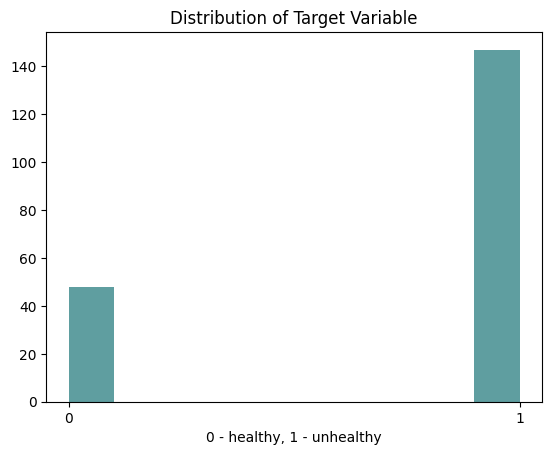

In [13]:
# The result provides a visual representation of how many individuals are classified as 
# healthy (status=0) and how many are classified as unhealthy (status=1) in your dataset. 

plt.title('Distribution of Target Variable')
plt.xticks([0,1])
plt.xlabel('0 - healthy, 1 - unhealthy')
plt.hist([data['status']], color=['cadetblue'])
plt.show()


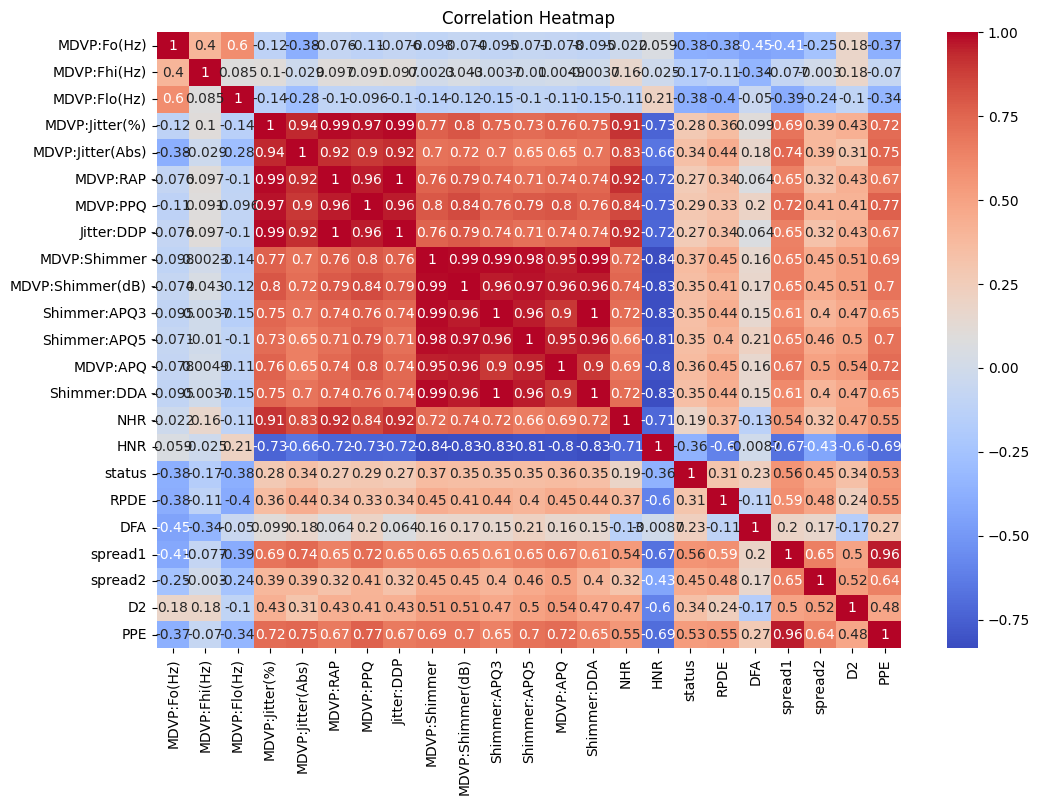

In [14]:
# Visualization of dataset

# Correlation heatmap

# New figure with a specific size. The figsize parameter defines the width and height of the figure in inches.
plt.figure(figsize=(12, 8))

# The resulting heatmap provides a visual representation of the correlations between pairs of numerical features 
# in your dataset.
sns.heatmap(data.corr(numeric_only = True), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()

Project Idea:

The model can be used to differentiate healthy people from people having Parkinson’s disease. 

Due to the size of the dataset, I decided to build multiple models and compare their results. 
Models that are used:
    1. Logistic regression 
    2. KNearestNeighbors 
    3. ensamble BaggingClassifier (KNearestNeighbors) 
    4. XGBoost 
    5. DecisionTreeClassifier

Spliting dataset

I have used sklearn.model_selection.train_test_split() method for spliting dataset into Training/Test/Validation subset.

First, split the data into train_val and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

Next, split the train_val set into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=7,stratify=y_train_val)

test_size parameter is set to 0.2 for X_test and 0.25 for X_val
random_state is set to 7
random_state is used for randomness of spliting data and to ensure that the data splitting process is reproducible

Stratify parameter is used to ensure that the class distribution of the target variable is approximately 
the same in both the training and testing datasets as it is in the original dataset

In [17]:
# Load saved models and scalers. (models/...)
model_names = []
models = []
scalers = []

Info about training model - Logistic regression

Provided parameters for hyperparameter tuning were: 
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
penalties = ['l1', 'l2', None]  

I have made loop for testing all posibble configuration's parameters (Evaluate on Validation subset)
with 2 additional parameters: max_iter=3000, class_weight='balanced'

model = LogisticRegression(solver=solver, penalty=penal, max_iter=3000, class_weight='balanced')

The best parameters: Solver = sag, Penalty = None
Accuracy (Validation subset) = 0.769

In [18]:
# Loading model Logistic regression 
with open('../models/log_reg_classifier.model.pickle', 'rb') as scaler_file:
    log_reg_lbfgs_model = pickle.load(scaler_file)
with open('../models/log_reg_classifier.scaler.pickle', 'rb') as scaler_file:
    log_reg_lbfgs_scaler = pickle.load(scaler_file)
model_names.append('Logistic Regression')
models.append(log_reg_lbfgs_model)
scalers.append(log_reg_lbfgs_scaler)


Info about training model - KNeighborsClassifier

Provided parameters for hyperparameter tuning were: 
n_neighbors = [3,5,7,9,11,13]
weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan']

I have made loop for testing all posibble configuration's parameters (Evaluate on Validation subset)
model: KNeighborsClassifier(n_neighbors=n_neigh,weights=weight,metric=met)

The best parameters: n_neighbors=3, weights=uniform, metric=minkowski
Accuracy (Validation subset) = 0.948

In [19]:
# K Neighbors Classifier
with open('../models/k_neighbors_classifier.model.pickle', 'rb') as scaler_file:
    k_neighbors_model = pickle.load(scaler_file)
with open('../models/k_neighbors_classifier.scaler.pickle', 'rb') as scaler_file:
    k_neighbors_scaler = pickle.load(scaler_file)
model_names.append('KNeighborsClassifier')
models.append(k_neighbors_model)
scalers.append(k_neighbors_scaler)



Info about training model - Ensemble of KNeighborsClassifiers

Provided parameters for hyperparameter tuning were: 
base_estimator = KNeighborsClassifier(n_neighbors=3,metric='minkowski', weights='uniform')  

n_estimators= [5,10, 50, 100, 200]
max_samples= [0.5, 0.7, 0.9, 1.0]
max_features= [0.5, 0.7, 0.9, 1.0]
bootst = True

I have made loop for testing all posibble configuration's parameters (Evaluate on Validation subset)
model: ensemble.BaggingClassifier(estimator=base_estimator,n_estimators=n_est,max_samples=sample,max_features = feat,bootstrap = bootst)

The best parameters: n_estimators=5, max_samples=0.7, max_features=1.0
Accuracy (Validation subset) = 0.974

In [20]:
# Ensemble K Neighbors Classifier
with open('../models/ensamble_k_neighbors_classifier.model.pickle', 'rb') as scaler_file:
    ensamble_k_neighbors_model = pickle.load(scaler_file)
with open('../models/ensamble_k_neighbors_classifier.scaler.pickle', 'rb') as scaler_file:
    ensamble_k_neighbors_scaler = pickle.load(scaler_file)
model_names.append('Ensemble KNeighborsClassifier')
models.append(ensamble_k_neighbors_model)
scalers.append(ensamble_k_neighbors_scaler)



Info about training model - XGBoost

I have used RandomizedSearchCV(model,params,n_iter=5, refit=True,scoring='accuracy', cv=3, random_state=7, verbose=2, error_score='raise')
for performing random search using cross-validation  
Result was finding best subset of hyperparameters -> that leads to the best model of provided parameters.

Provided parameters were: 
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': range(100, 1000, 100),
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}

The best parameters: learning_rate=0.2, n_estimators=500, max_depth=5, subsample=0.9, colsample_bytree=1.0, gamma=0.1
Best score: 0.888

In [21]:
# XgBoost
with open('../models/xgboost.model.pickle', 'rb') as scaler_file:
    xgboost_model = pickle.load(scaler_file)
with open('../models/xgboost.scaler.pickle', 'rb') as scaler_file:
    xgboost_scaler = pickle.load(scaler_file)
model_names.append('XgBoost')
models.append(xgboost_model)
scalers.append(xgboost_scaler)


Info about training model - Decision Tree

I have used GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy',refit=True)
for finding best subset of hyperparameters

Provided parameters were: 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

The best parameters: 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10
Best score on validation data: 0.871

In [22]:
# Decision Tree
with open('../models/decision_tree.model.pickle', 'rb') as scaler_file:
    decision_tree_model = pickle.load(scaler_file)
with open('../models/decision_tree.scaler.pickle', 'rb') as scaler_file:
    decision_tree_scaler = pickle.load(scaler_file)
model_names.append('DecisionTree')
models.append(decision_tree_model)
scalers.append(decision_tree_scaler)


In [23]:
# Separate features (X) and target (y)
X = data.drop(['name', 'status'], axis=1)  # Remove 'name' and 'status' columns from feature variable

y = data['status']  # Target variable

_, X_test, _, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)

X.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [24]:
# Dictionary to store results

results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": [], "Confusion-Matrix": [], "ROC-AUC": []}

all_models = {'model_names': model_names, 'models': models, 'scalers': scalers}

for model_name, model, scaler in zip(all_models['model_names'],all_models['models'],all_models['scalers']):
    print('=======================================================================')
    print(model_name,model,scaler)
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    prec_score = precision_score(y_test,y_pred)
    rec_score = recall_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision score: {prec_score:.2f}")
    print(f"Recall score: {rec_score:.2f}")
    print(f"F1 score: {f1score:.2f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", report)
    
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(prec_score)
    results["Recall"].append(rec_score)
    results["F1-Score"].append(f1score)
    results["Confusion-Matrix"].append(conf_matrix)
    results["ROC-AUC"].append((fpr,tpr,roc_auc))


Logistic Regression LogisticRegression(class_weight='balanced', max_iter=3000, penalty=None,
                   solver='sag') StandardScaler()
Accuracy: 0.81
Precision score: 0.95
Recall score: 0.80
F1 score: 0.86
Confusion Matrix:
 [[13  2]
 [ 9 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.87      0.70        15
           1       0.95      0.80      0.86        44

    accuracy                           0.81        59
   macro avg       0.77      0.83      0.78        59
weighted avg       0.86      0.81      0.82        59

KNeighborsClassifier KNeighborsClassifier(n_neighbors=3) StandardScaler()
Accuracy: 0.93
Precision score: 0.95
Recall score: 0.95
F1 score: 0.95
Confusion Matrix:
 [[13  2]
 [ 2 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.95      0.95      0.95        44

    accuracy              

In [25]:
results_df = pd.DataFrame(results)

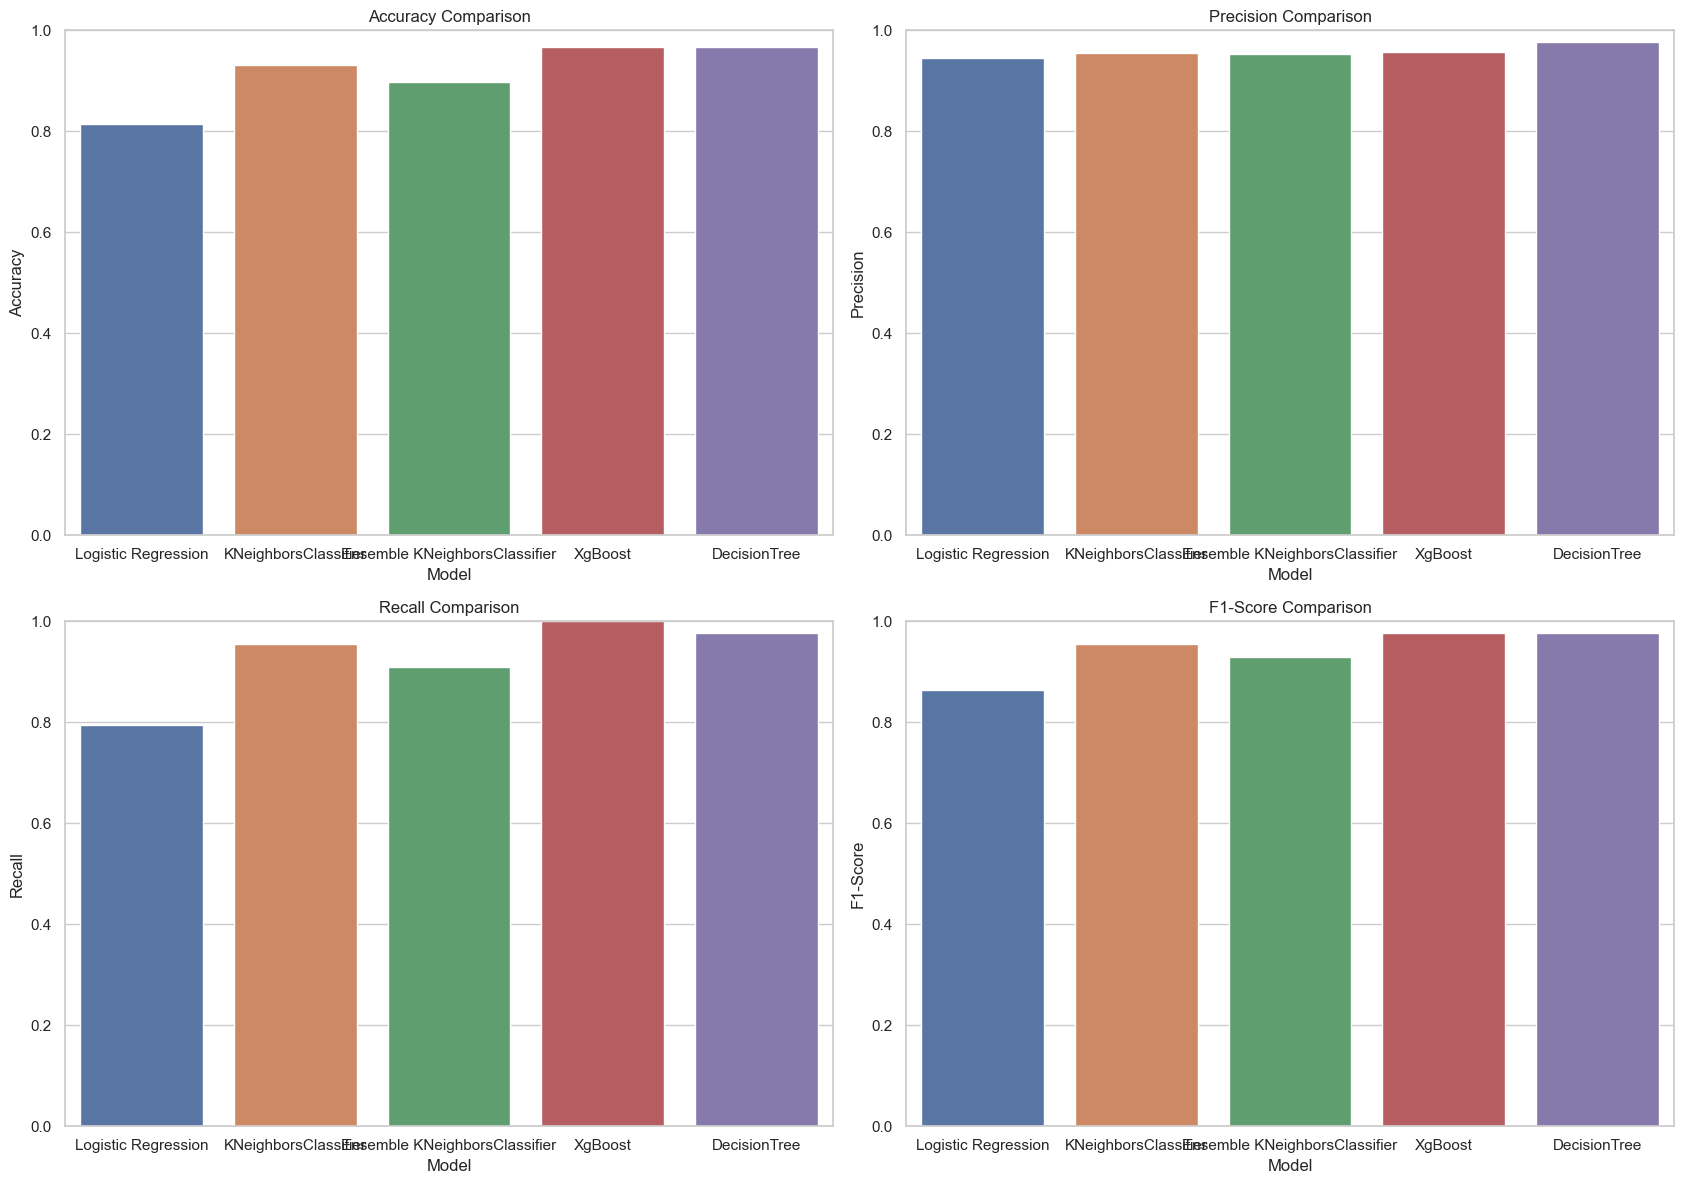

In [26]:
# Visualization of models comparation
# Set the style of the plots (optional)
sns.set(style="whitegrid")

# Create subplots (you can customize the layout)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 12))

# Plot accuracy
sns.barplot(x="Model", y="Accuracy", data=results_df, ax=axes[0, 0])
axes[0, 0].set_title("Accuracy Comparison")
axes[0, 0].set_ylim(0, 1)

# Plot precision
sns.barplot(x="Model", y="Precision", data=results_df, ax=axes[0, 1])
axes[0, 1].set_title("Precision Comparison")
axes[0, 1].set_ylim(0, 1)

# Plot recall
sns.barplot(x="Model", y="Recall", data=results_df, ax=axes[1, 0])
axes[1, 0].set_title("Recall Comparison")
axes[1, 0].set_ylim(0, 1)

# Plot F1-Score
sns.barplot(x="Model", y="F1-Score", data=results_df, ax=axes[1, 1])
axes[1, 1].set_title("F1-Score Comparison")
axes[1, 1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

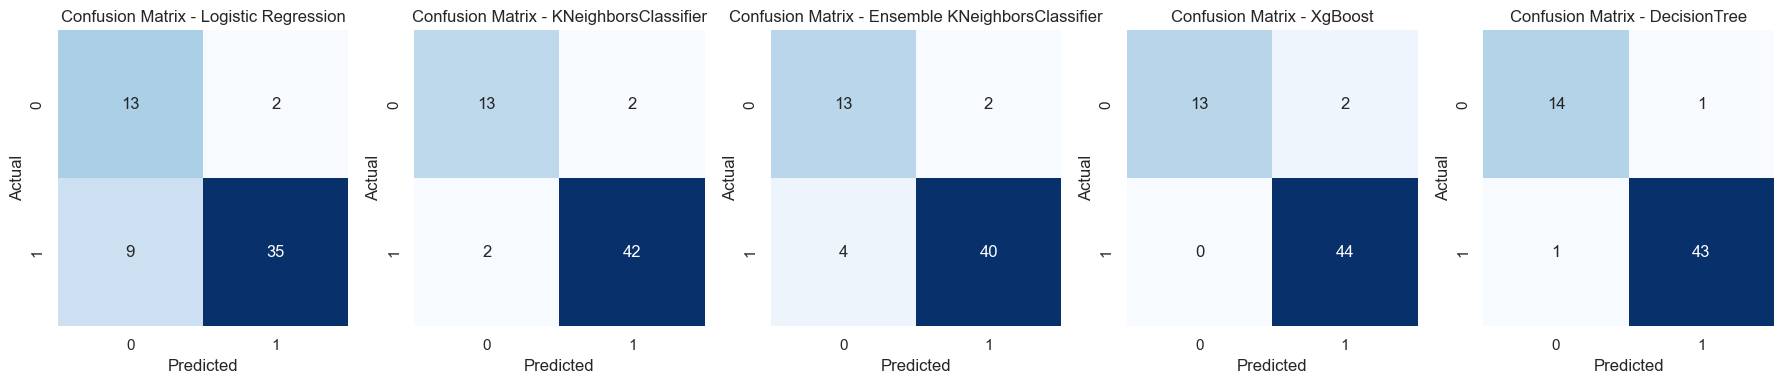

In [27]:
num_models = 5
fig, axes = plt.subplots(1, num_models, figsize=(18, 4))  # Adjust figsize as needed

for i, (model_name, cm) in enumerate(zip(results['Model'],results['Confusion-Matrix'])):
    # Plot the confusion matrix heatmap on the current axis
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


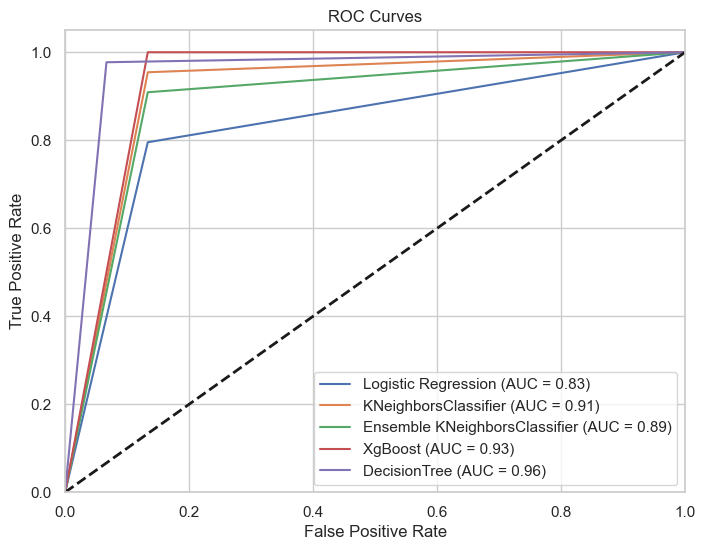

In [28]:
# Roc Curve - AUC
plt.figure(figsize=(8, 6))
for model_name, roc_auc_tuple in zip(results['Model'],results['ROC-AUC']):
    fpr, tpr, roc_auc = roc_auc_tuple
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

Conclusion
The best model with the highest accuracy is XGBoost Classifer
The second model with highest evaluation score is DecisionTreeClassifier

XgBoost Classifier
Accuracy: 0.98
Precision score: 0.98
Recall score: 0.99
F1 score: 0.99
Confusion Matrix:
 [[ 45   3]
 [  1 146]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.98      0.99      0.99       147

    accuracy                           0.98       195
   macro avg       0.98      0.97      0.97       195
weighted avg       0.98      0.98      0.98       195



DecisionTreeClassifier
Accuracy: 0.97
Precision score: 0.98
Recall score: 0.98
F1 score: 0.98
Confusion Matrix:
 [[14  1]
 [ 1 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.98      0.98      0.98        44

    accuracy                           0.97        59
   macro avg       0.96      0.96      0.96        59
weighted avg       0.97      0.97      0.97        59



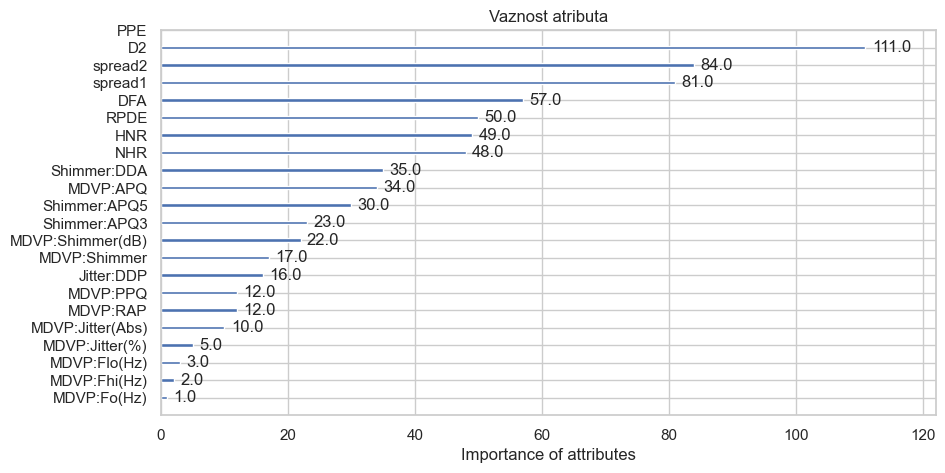

In [30]:
# Importance of attributes in XgBoost
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
xgb.plot_importance(xgboost_model, ax= ax, xlabel='Importance of attributes', ylabel=None, title='Vaznost atributa')
ax.set_yticks(range(len(X.keys())))
ax.set_yticklabels(X.keys())
plt.show()

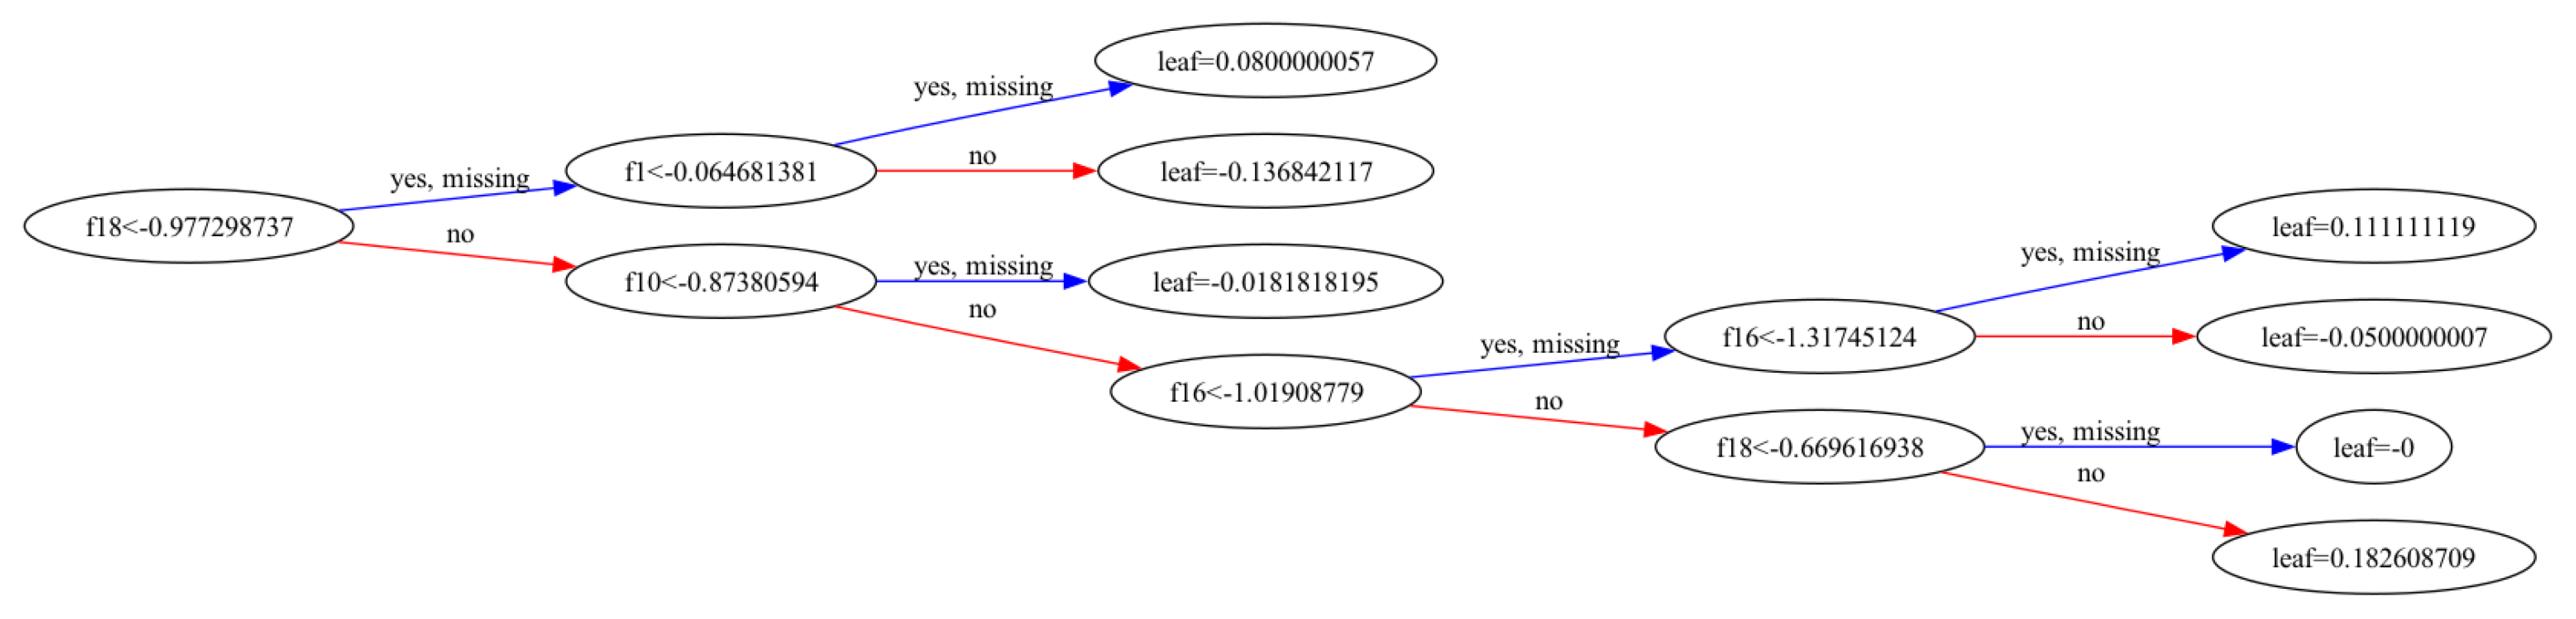

In [31]:
# Visualizing xgboost model with graphviz library

plt.figure(figsize=(20, 15), dpi=180)
ax = plt.subplot(1, 1, 1)
xgb.plot_tree(xgboost_model, ax=ax, rankdir='LR')
plt.show()